# NumTopics: all datasets

In [2]:
%load_ext autoreload
%autoreload 2

import time
import sys

import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
sys.path.insert(0, '../..')
from topicnet.cooking_machine.models import TopicModel
from topicnet.cooking_machine.dataset import Dataset

In [143]:

sys.path.insert(0, '..')

from topnum.data.vowpal_wabbit_text_collection import VowpalWabbitTextCollection
from topnum.search_methods.optimize_scores_method import OptimizeScoresMethod

from topnum.utils import (
    read_corpus_config, split_into_train_test, 
    build_every_score, monotonity_and_std_analysis, 
    trim_config, plot_everything_informative
)


from topnum.model_constructor import KnownModel


In [7]:
import warnings

warnings.filterwarnings("ignore", category=UserWarning)


## Experiments

In [103]:
import os
configs_dir = os.path.join('..', 'topnum', 'configs')
configs_mask = os.path.join(configs_dir, '*.yml')


for config_file in glob.glob(configs_mask):
    config = read_corpus_config(config_file)
    print(config['name'])



StackOverflow
RuWikiGood
Brown
Reuters
WikiRef220
PostNauka
20NewsGroups


In [105]:
# for debug

config = read_corpus_config(configs_dir + "/Brown.yml")

config['num_restarts'] = 1
config['num_topics_interval'] = 10



In [106]:
dataset = Dataset(
    config['dataset_path'], 
    internals_folder_path=f'/home/vbulatov/Projects/OptimalNumberOfTopics/demos/{config["batches_prefix"]}_internals'
)

train_dataset, test_dataset = split_into_train_test(dataset, config)

text_collection = VowpalWabbitTextCollection.from_dataset(train_dataset, main_modality=config['word'])


In [108]:
experiment_name_template = "num_topics_{}"
experiment_directory=f"/data_mil/vbulatov/{config['batches_prefix']}_test1"


for model_family in KnownModel:
    experiment_name = experiment_name_template.format(model_family.value)
    optimizer = OptimizeScoresMethod(
        scores=build_every_score(train_dataset, test_dataset, config),
        model_family=model_family,
        experiment_name=experiment_name,
        experiment_directory=experiment_directory,
        one_model_num_processors=10,
        **trim_config(config, OptimizeScoresMethod)
    )
    t_start = time.time()

    optimizer.search_for_optimum(text_collection)
    t_end = time.time()
    print(model_family, (t_end - t_start) / 60)




  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [09:24<00:00, 564.42s/it]

/home/vbulatov/miniconda3/envs/py36/lib/python3.6/site-packages/numpy/lib/nanfunctions.py:1018: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


  0%|          | 0/1 [00:00<?, ?it/s]

KnownModel.LDA 9.41008943716685




100%|██████████| 1/1 [09:08<00:00, 548.63s/it]

/home/vbulatov/miniconda3/envs/py36/lib/python3.6/site-packages/numpy/lib/nanfunctions.py:1018: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


  0%|          | 0/1 [00:00<?, ?it/s]

KnownModel.PLSA 9.147149407863617




100%|██████████| 1/1 [09:43<00:00, 583.62s/it]

/home/vbulatov/miniconda3/envs/py36/lib/python3.6/site-packages/numpy/lib/nanfunctions.py:1018: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


  0%|          | 0/1 [00:00<?, ?it/s]

KnownModel.SPARSE 9.72989991903305




100%|██████████| 1/1 [09:19<00:00, 559.15s/it]

/home/vbulatov/miniconda3/envs/py36/lib/python3.6/site-packages/numpy/lib/nanfunctions.py:1018: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


  0%|          | 0/1 [00:00<?, ?it/s]

KnownModel.DECORRELATION 9.322900911172232




100%|██████████| 1/1 [09:56<00:00, 596.49s/it]



KnownModel.ARTM 9.944272383054097


/home/vbulatov/miniconda3/envs/py36/lib/python3.6/site-packages/numpy/lib/nanfunctions.py:1018: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


In [133]:
all_models_mask = os.path.join(experiment_directory, experiment_name_template.format("*"), "*")

for entry in glob.glob(all_models_mask):
    print(entry)
    tm = TopicModel.load(entry)
    print(len(tm.topic_names), estimate_num_iterations_for_convergence(tm))



/data_mil/vbulatov/Brown_test1/num_topics_ARTM_None/41f5bcf6-7040-4056-8df4-690172958d7f
6 11
/data_mil/vbulatov/Brown_test1/num_topics_ARTM_None/3a6ccf86-df67-4bad-83b9-8ef6cc3d974f
16 10
/data_mil/vbulatov/Brown_test1/num_topics_ARTM_None/bfbbe62c-a1bf-42e2-8147-2c6a70ce8064
26 11
/data_mil/vbulatov/Brown_test1/num_topics_sparse_None/a27c7504-71b4-490c-9753-18ebdb419d84
16 10
/data_mil/vbulatov/Brown_test1/num_topics_sparse_None/6b072b33-35fb-44e7-bf0e-076286efa65c
6 11
/data_mil/vbulatov/Brown_test1/num_topics_sparse_None/f8d52a01-7df3-44d3-b790-cb3d313cf69f
26 11
/data_mil/vbulatov/Brown_test1/num_topics_PLSA_None/815096c5-cc66-4c89-94d4-a9545c361249
5 17
/data_mil/vbulatov/Brown_test1/num_topics_PLSA_None/c40a004c-333f-4b84-9b65-a6bdeded7a4d
15 13
/data_mil/vbulatov/Brown_test1/num_topics_PLSA_None/526efb03-219e-4992-bf62-c834c86b8a88
25 12
/data_mil/vbulatov/Brown_test1/num_topics_decorrelation_None/c831bb95-ce29-4957-9565-ea82a80b2598
5 17
/data_mil/vbulatov/Brown_test1/num_topi

In [134]:
monotonity_and_std_analysis(
    experiment_name_template=experiment_name_template,
    experiment_directory=experiment_directory,
)

/home/vbulatov/miniconda3/envs/py36/lib/python3.6/site-packages/numpy/lib/nanfunctions.py:1018: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/home/vbulatov/miniconda3/envs/py36/lib/python3.6/site-packages/numpy/lib/function_base.py:4033: RuntimeWarning: All-NaN slice encountered
  r = func(a, **kwargs)


LDA 1
PLSA 1
sparse 1
decorrelation 1
ARTM 1


,LDA,PLSA,sparse,decorrelation,ARTM
PerplexityScore@all,True,True,True,True,True
SparsityThetaScore,True,True,True,True,True
SparsityPhiScore@word,True,True,True,True,True
PerplexityScore@word,True,True,True,True,True
TopicKernel@word.average_coherence,True,True,True,True,True
TopicKernel@word.average_contrast,True,True,True,True,True
TopicKernel@word.average_purity,True,True,True,True,True
TopicKernel@word.average_size,True,True,True,True,True
perp,True,True,True,True,True
sparsity_phi,True,True,True,True,True


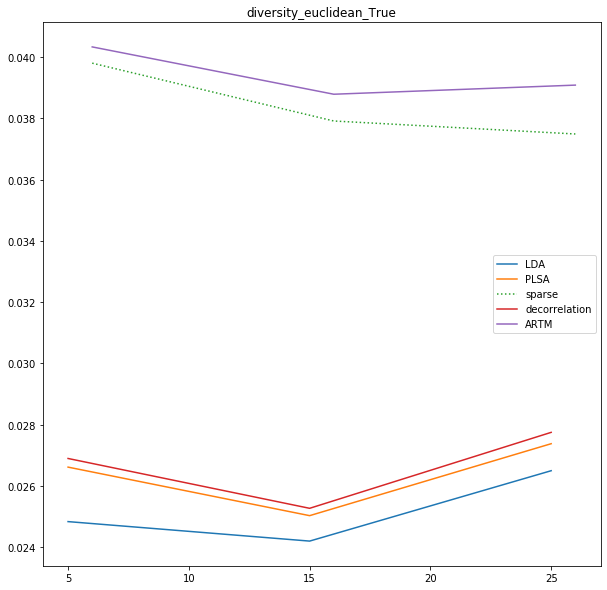

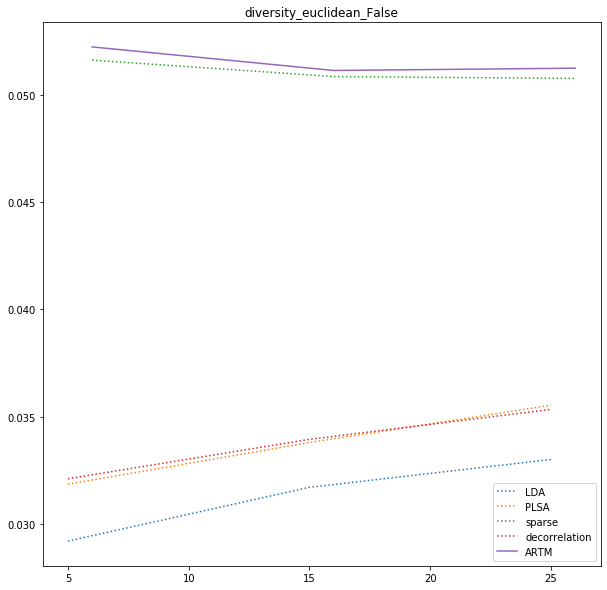

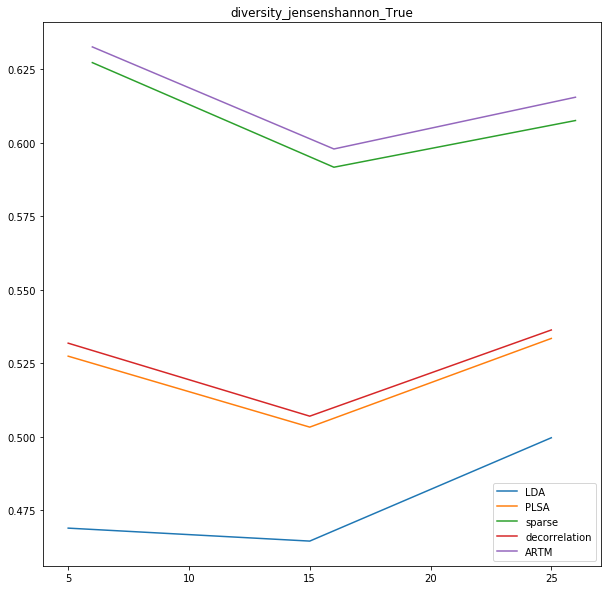

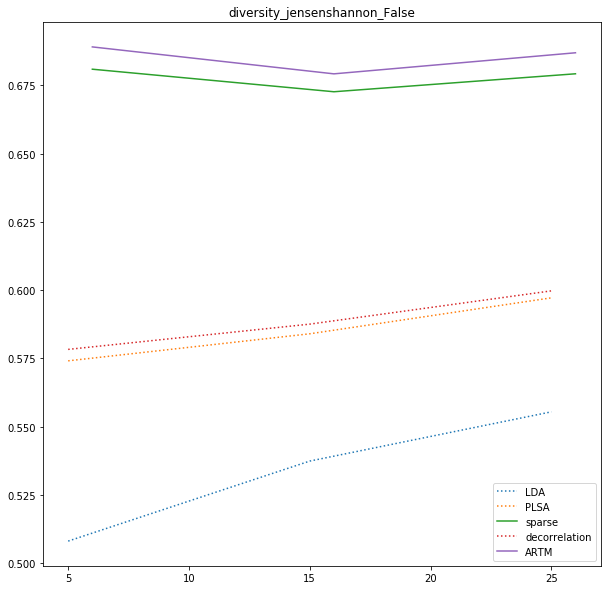

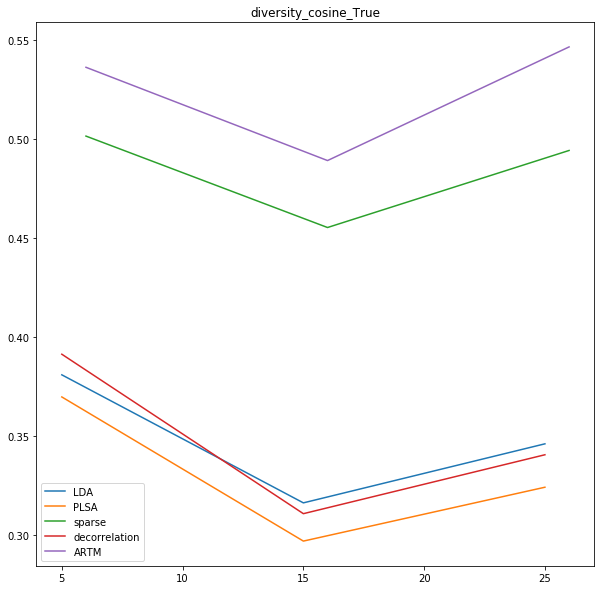

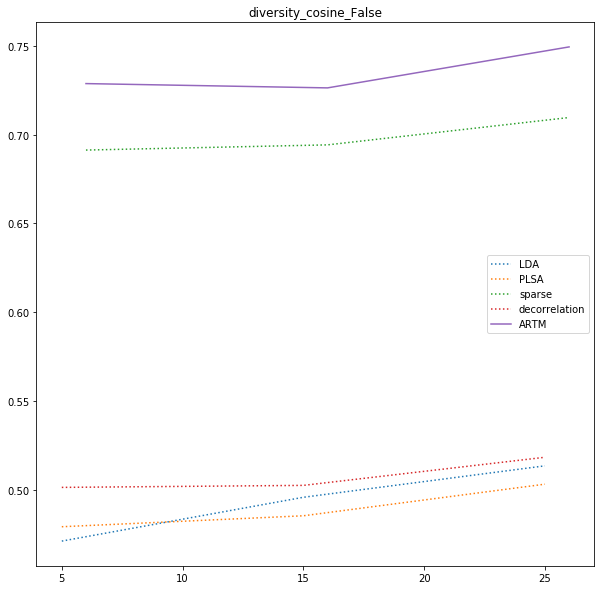

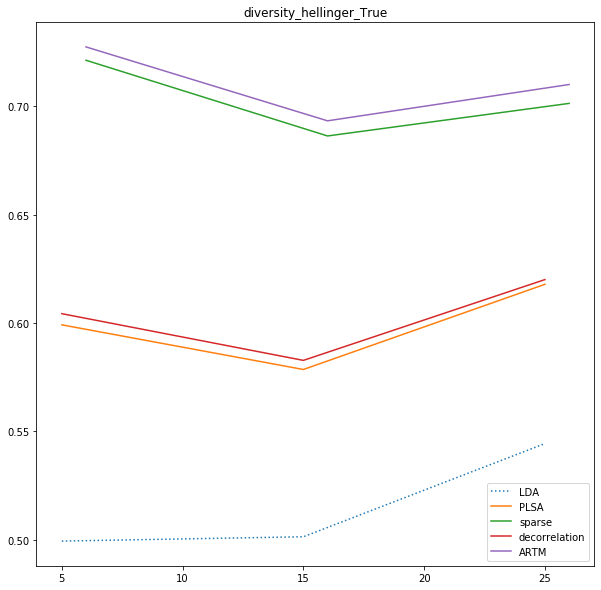

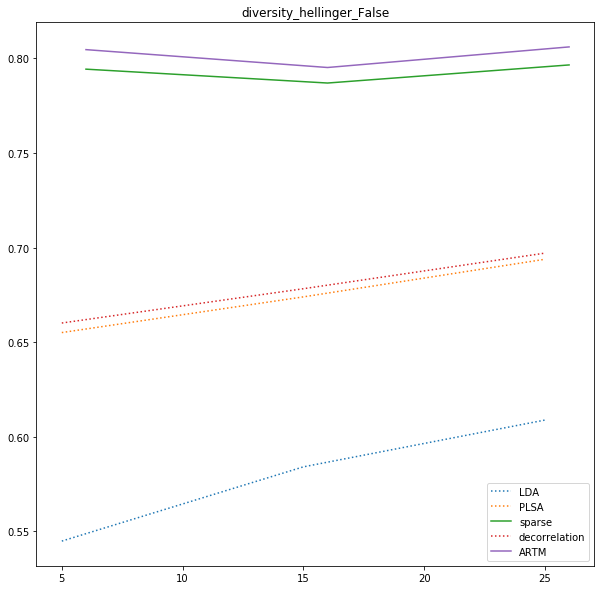

In [155]:

plot_everything_informative(experiment_directory, experiment_name_template, ["diversity"])


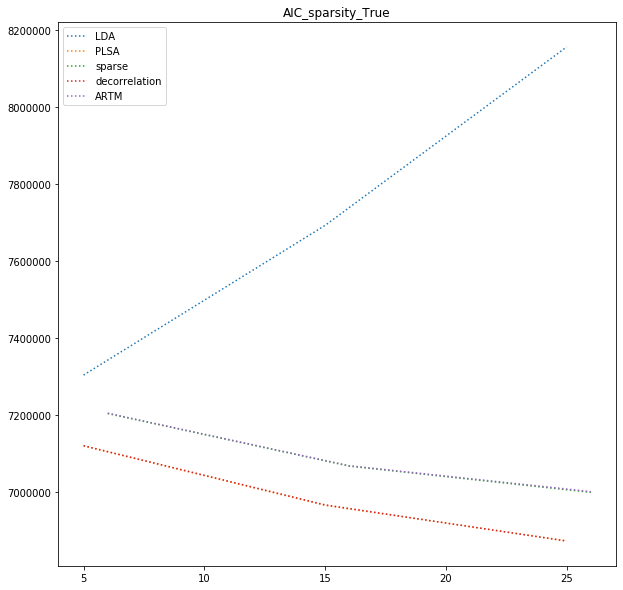

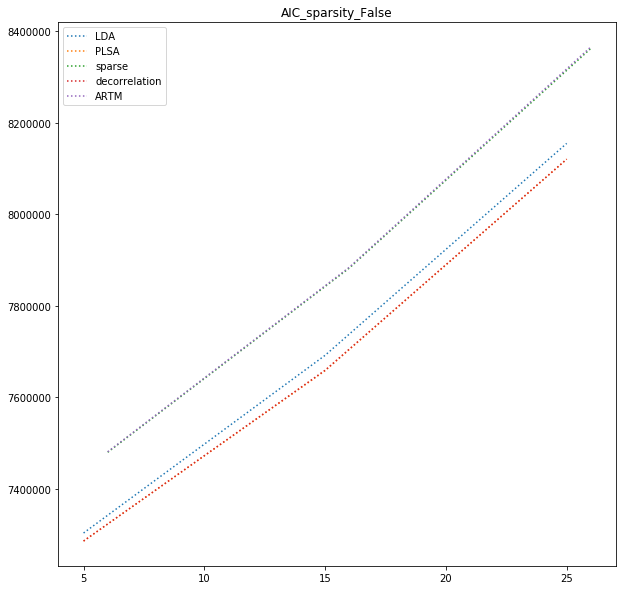

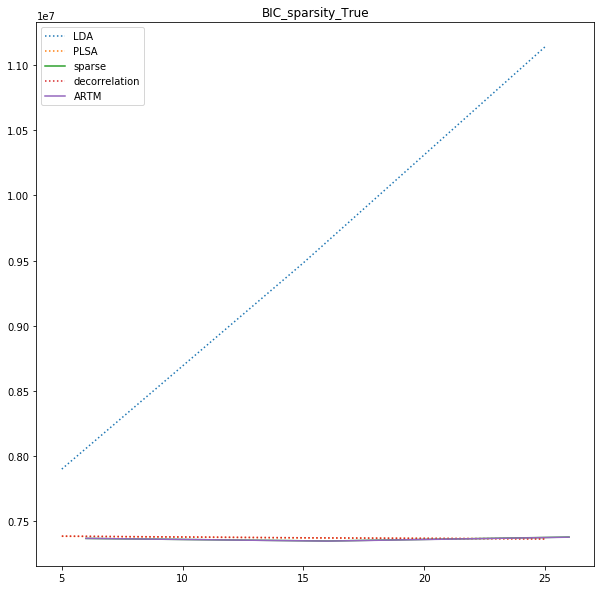

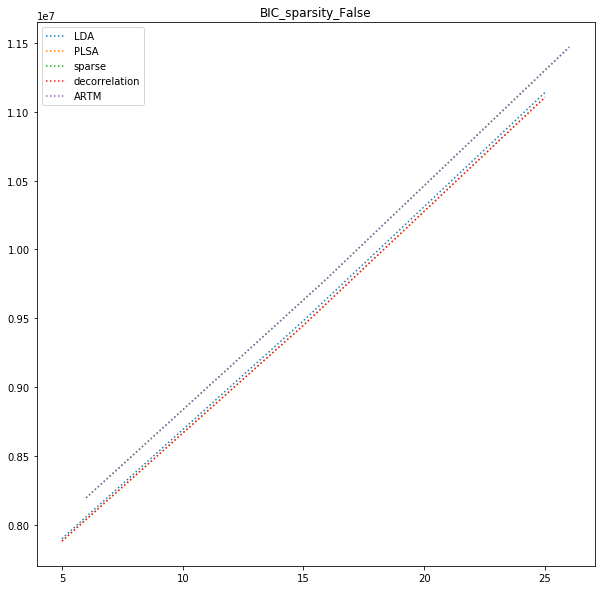

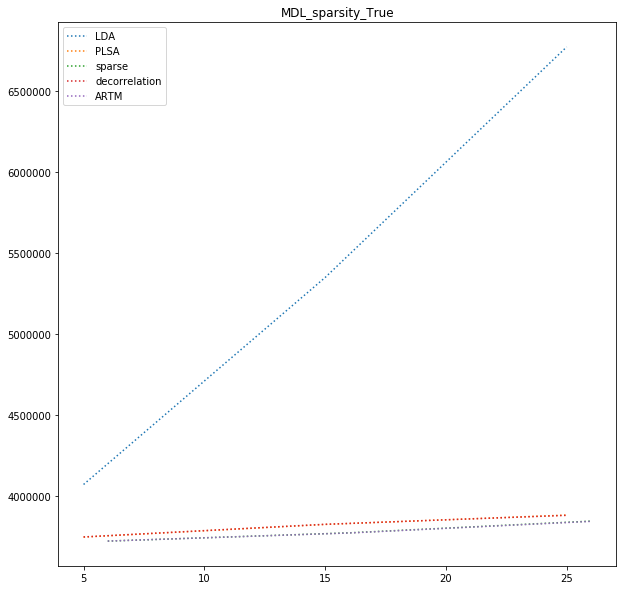

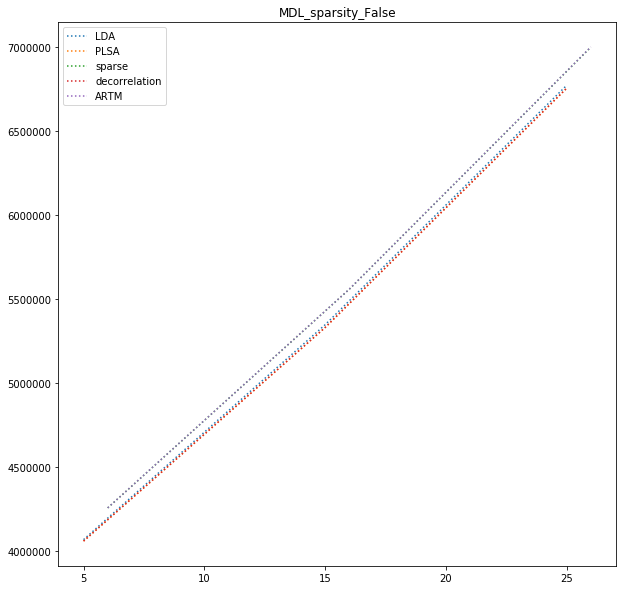

In [156]:
plot_everything_informative(experiment_directory, experiment_name_template, ["_sparsity"])


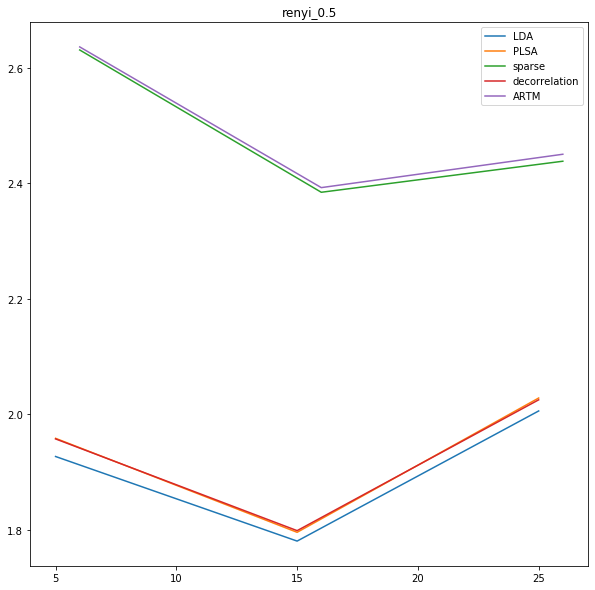

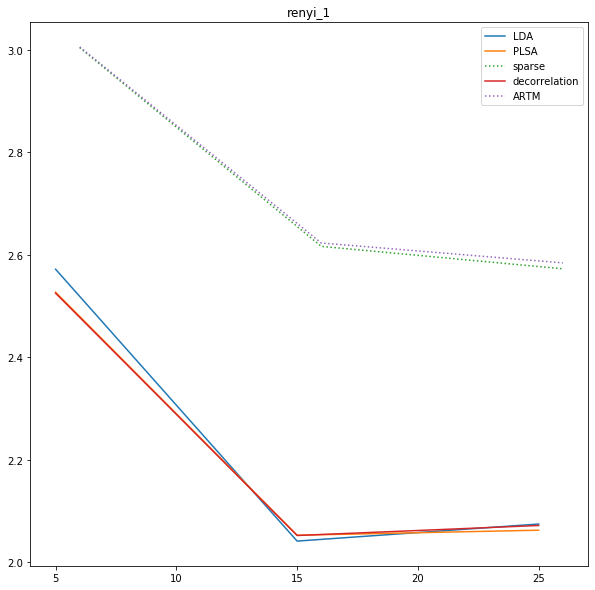

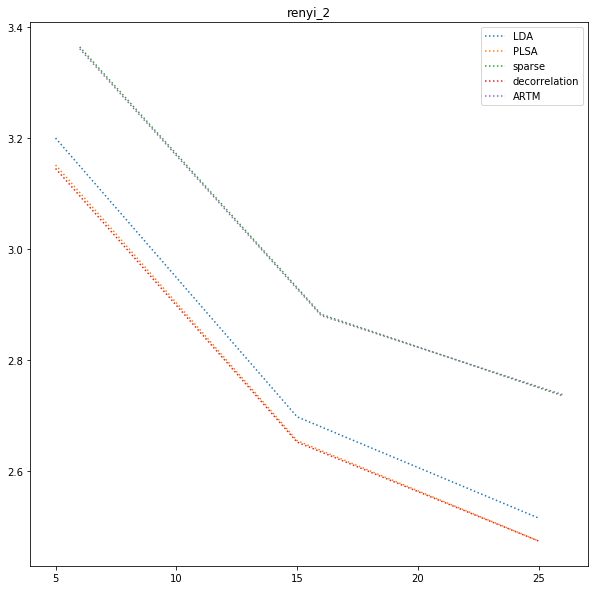

In [157]:
plot_everything_informative(experiment_directory, experiment_name_template, ['renyi'])


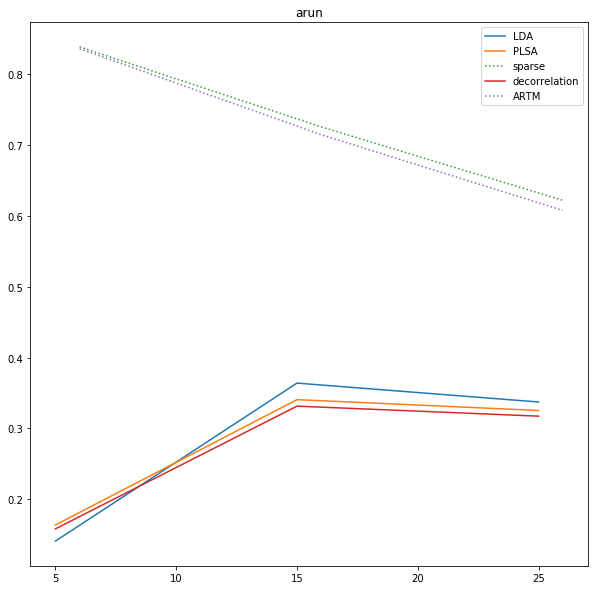

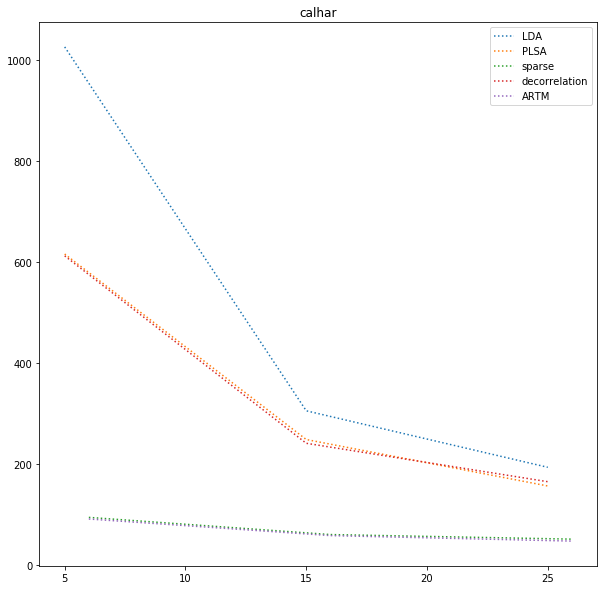

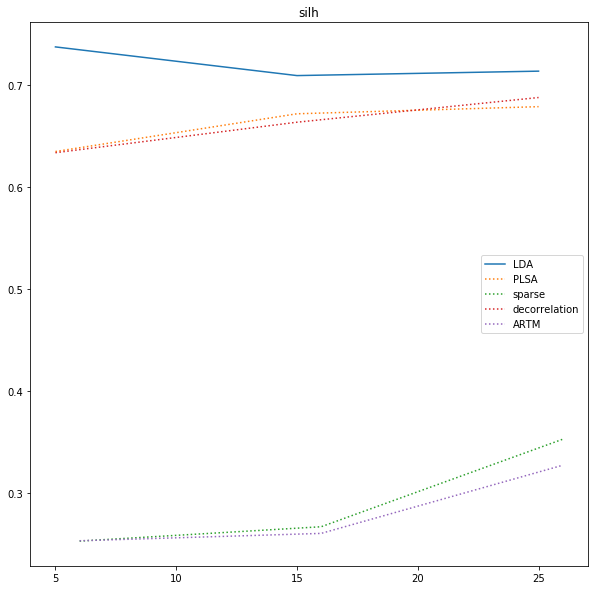

In [158]:
plot_everything_informative(experiment_directory, experiment_name_template, ['arun'])
plot_everything_informative(experiment_directory, experiment_name_template, ['calhar'])
plot_everything_informative(experiment_directory, experiment_name_template, ['silh'])


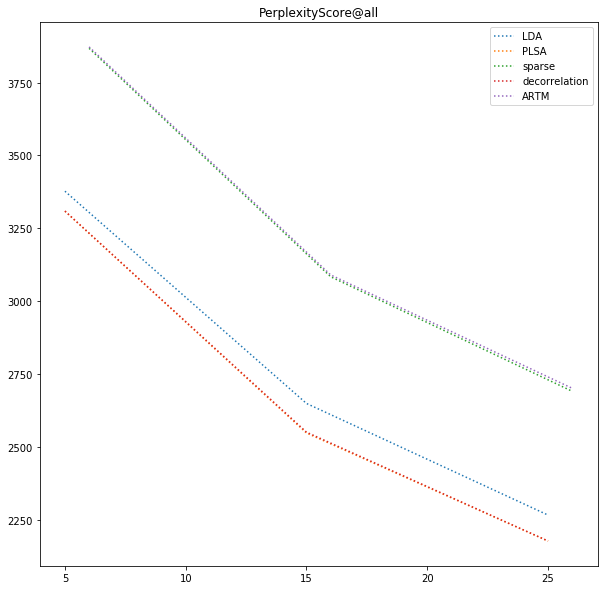

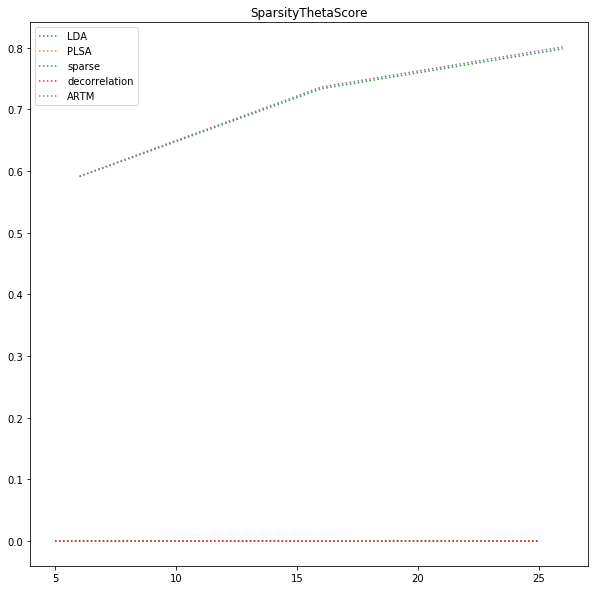

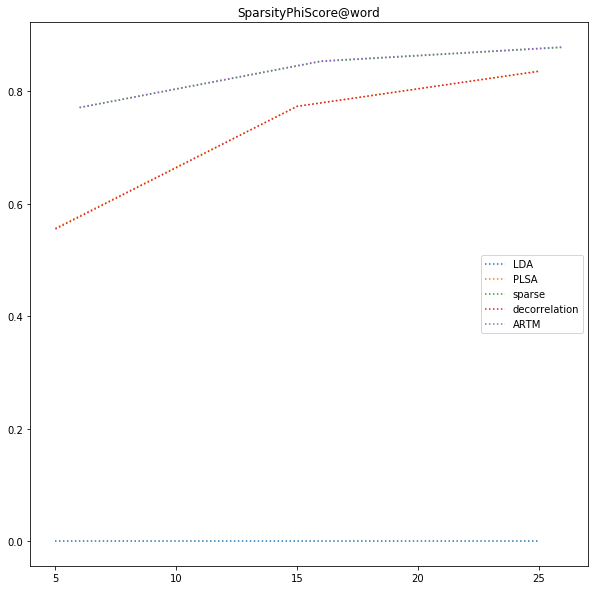

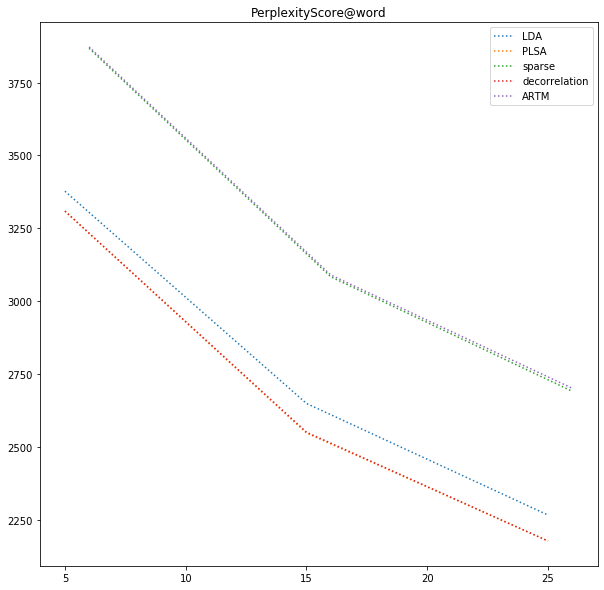

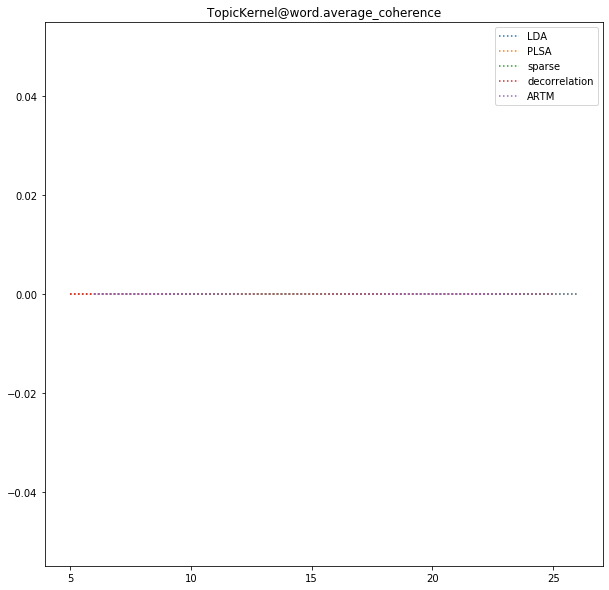

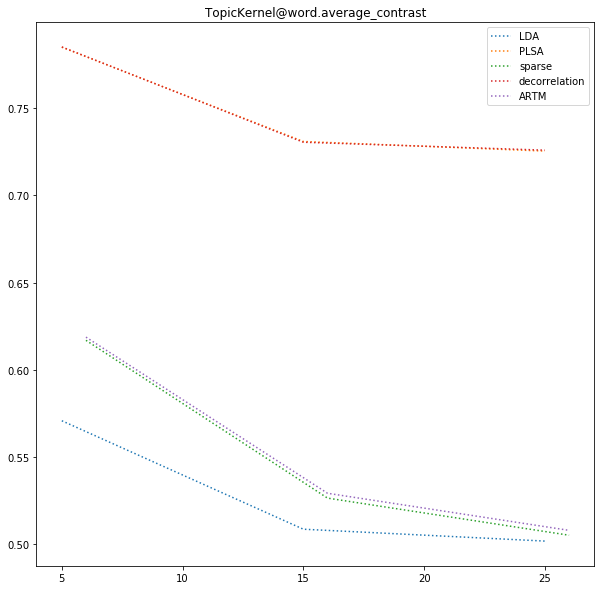

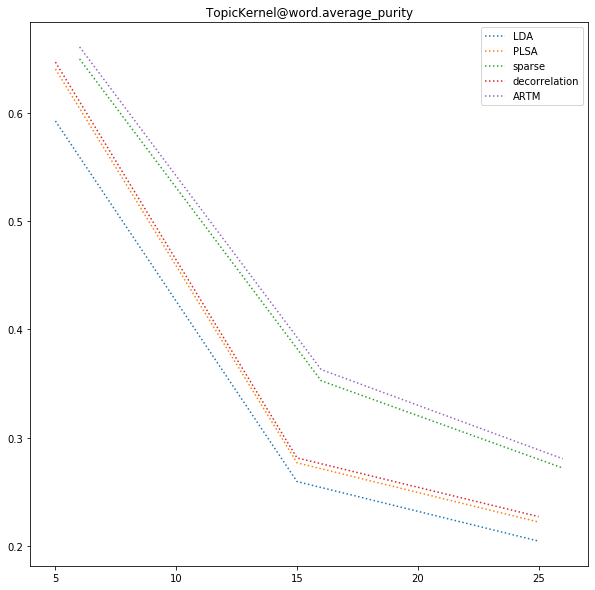

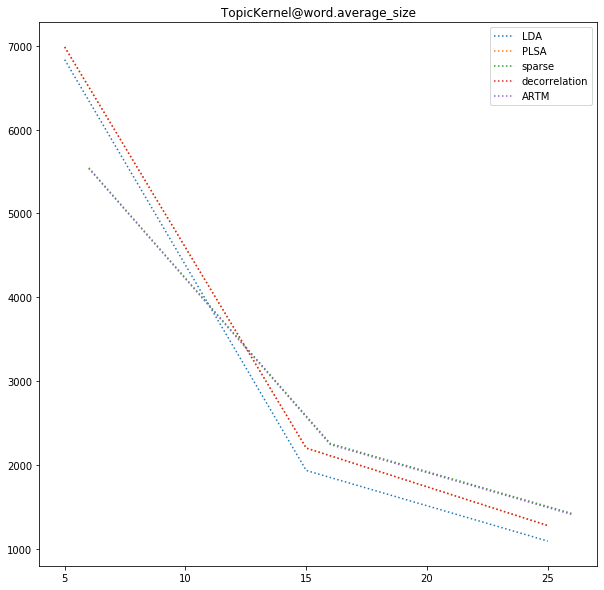

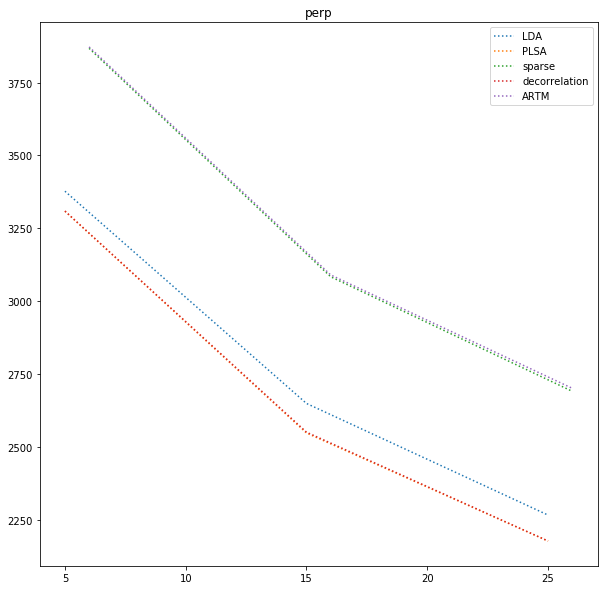

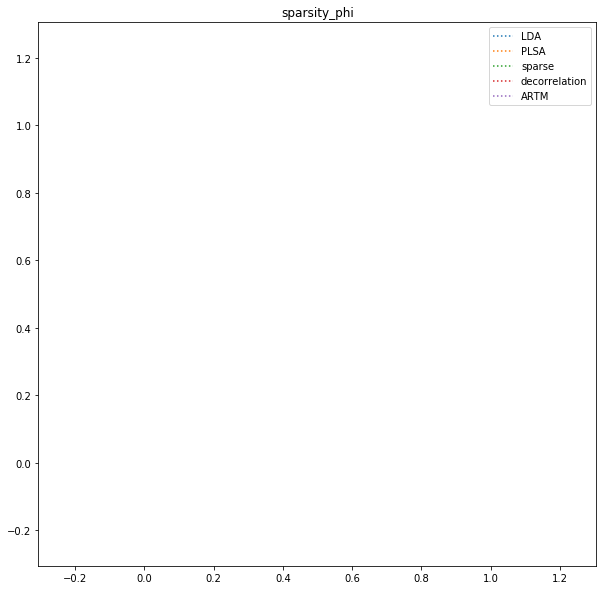

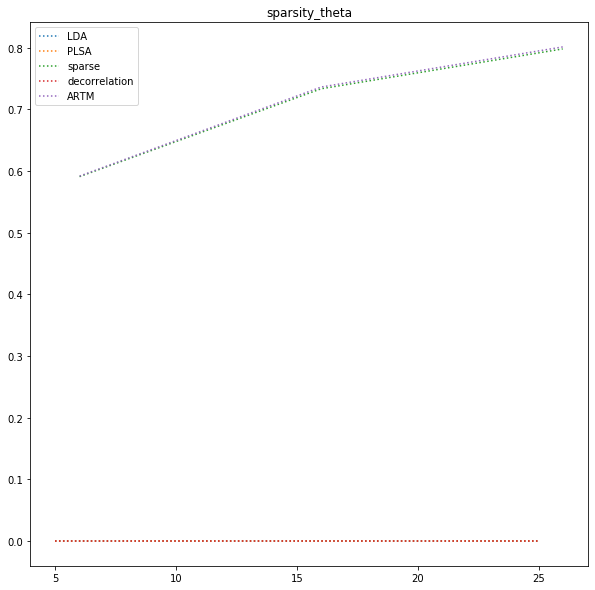

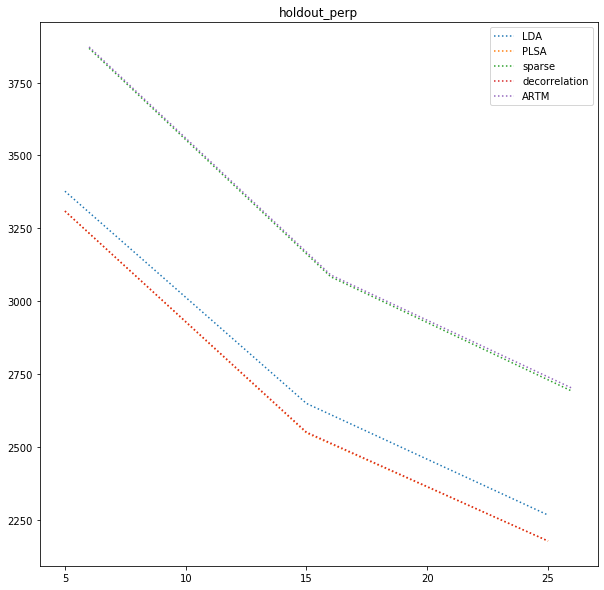

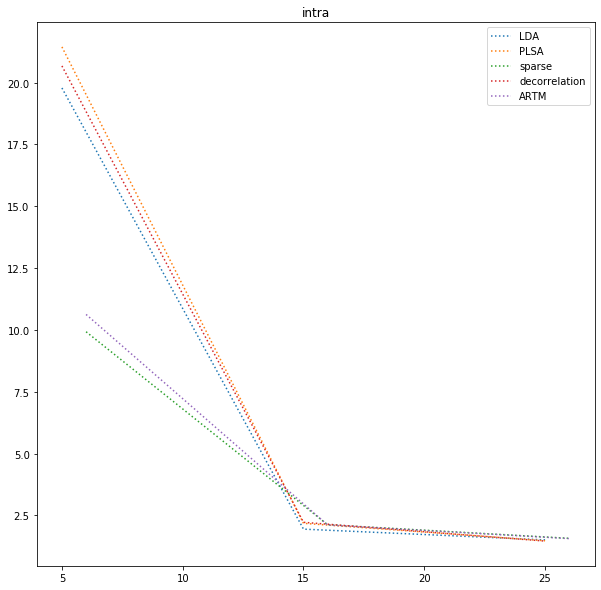

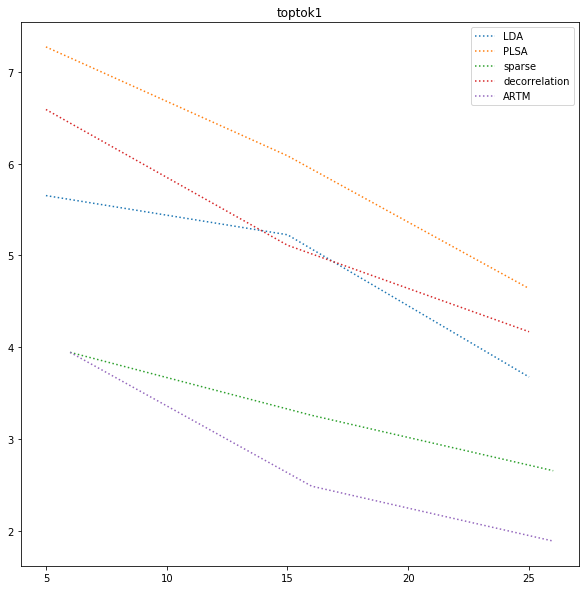

In [159]:
plot_everything_informative(experiment_directory, experiment_name_template, [], 
                            ["diversity", "_sparsity", 'renyi', 'arun', 'calhar', 'silh'])
